In [ ]:
from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import torch
%pip install tensorflow==2.3.0
import transformers as ppb # pytorch transformers

In [4]:
path = join("wust_2k20_twitter_emotion_annotations.json")

In [5]:
df = pd.read_json(path)
df

,id,tweet,most_common_annotation,annotation_1,annotation_2,annotation_3,num_different_annotations,num_total_annotations
0,1320158927217197056,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne,neutralne,neutralne,neutralne,1.0,3
1,1196353360284332032,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne,neutralne,neutralne,neutralne,1.0,3
2,281016917563682816,Wigilię w @krecisie czas zacząć #christmas #św...,neutralne,radosc,neutralne,neutralne,2.0,3
3,1319551055424794624,Dzisiaj szału nie będzie. Nie bez powodu robi ...,smutek,smutek,neutralne,smutek,2.0,3
4,1314223009431982080,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw,podziw,podziw,podziw,1.0,3
...,...,...,...,...,...,...,...,...
5396,696339670028963840,Nowoczesna technologia nie zmieniła ludzkiej n...,neutralne,neutralne,smutek,neutralne,2.0,3
5397,319081006172876800,"Jak patrzę na jedzenie, to mi się odechciewa O...",wstret,wstret,wstret,zaskoczenie,2.0,3
5398,396538989210902528,HAHAHAHA ŚWIĄTECZNA REKLAMA ORANGE NA POLSACE ...,zaskoczenie,zaskoczenie,radosc,zaskoczenie,2.0,3
5399,189367806494654464,"@iGrabann a przepraszam, faktycznie, pomyłka, ...",radosc,neutralne,radosc,radosc,2.0,3


In [6]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.c, 'dkleczek/bert-base-polish-uncased-v1')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [7]:
tokenized = df.tweet.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [8]:
tokenized

0       [2, 2053, 2251, 2717, 12, 3217, 3173, 13, 3825...
1       [2, 7, 20620, 20649, 5956, 7, 9647, 3073, 3543...
2       [2, 24816, 3050, 65, 36, 4405, 5855, 1886, 217...
3       [2, 3223, 22030, 1893, 11594, 18, 1893, 2212, ...
4       [2, 7, 7801, 1997, 2051, 3413, 8432, 8432, 873...
                              ...                        
5396    [2, 20616, 13851, 1893, 12634, 13867, 10832, 1...
5397    [2, 1951, 4027, 1014, 1898, 6807, 16, 1907, 19...
5398    [2, 3179, 3675, 3675, 3675, 35936, 2788, 2452,...
5399    [2, 36, 26211, 9792, 1007, 43, 2451, 16, 9362,...
5400    [2, 2286, 25906, 8559, 52059, 1917, 16, 43, 24...
Name: tweet, Length: 5401, dtype: object

In [10]:
max_len = max([len(value) for value in tokenized.values])
print(max_len)

227


In [11]:
padded = np.array([value + [0]*(max_len-len(value)) for value in tokenized.values])

In [12]:
attention_mask = np.where(padded != 0, 1, 0)

In [74]:
padded.shape

(5401, 227)

In [14]:
print(padded)
arrays_padded = np.array_split(padded, 60)
print(arrays)
#torch.tensor(padded, dtype=int)
arrays_mask = np.array_split(attention_mask, 60)
last_hidden_states = []
with torch.no_grad():
    for arr, mask in zip(arrays_padded,arrays_mask):
        input_ids = torch.tensor(arr, dtype=int)
        attention_mask = torch.tensor(mask, dtype=int)
        last_hidden_states.append(model(input_ids, attention_mask=attention_mask))

[[    2  2053  2251 ...     0     0     0]
 [    2     7 20620 ...     0     0     0]
 [    2 24816  3050 ...     0     0     0]
 ...
 [    2  3179  3675 ...     0     0     0]
 [    2    36 26211 ...     0     0     0]
 [    2  2286 25906 ...     0     0     0]]
[array([[    2,  2053,  2251, ...,     0,     0,     0],
       [    2,     7, 20620, ...,     0,     0,     0],
       [    2, 24816,  3050, ...,     0,     0,     0],
       ...,
       [    2,   621, 52252, ...,     0,     0,     0],
       [    2, 20616, 13851, ...,     0,     0,     0],
       [    2,     7, 19679, ...,     0,     0,     0]]), array([[    2, 11954,  1013, ...,     0,     0,     0],
       [    2,  3895, 35197, ...,     0,     0,     0],
       [    2,     7, 19612, ...,     0,     0,     0],
       ...,
       [    2,  5890, 15960, ...,     0,     0,     0],
       [    2, 18523,  4430, ...,     0,     0,     0],
       [    2,    36,  2612, ...,     0,     0,     0]]), array([[    2,    18,    36, ...,  

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


In [87]:
last_hidden_states[1][0].shape

torch.Size([90, 227, 768])

In [84]:
tensors = last_hidden_states[0][0]
for i in range(1, len(last_hidden_states)):
    tensors = torch.cat([tensors, last_hidden_states[i][0]])
tensors.shape

torch.Size([5401, 227, 768])

In [88]:
tensors = tensors[:,0,:].numpy()
tensors.shape

(5401, 768)

In [93]:
X = pd.DataFrame(tensors)
X['vector'] = X.values.tolist()
df['X'] = X['vector']
df

,id,tweet,most_common_annotation,annotation_1,annotation_2,annotation_3,num_different_annotations,num_total_annotations,X
0,1320158927217197056,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne,neutralne,neutralne,neutralne,1.0,3,"[-1.3005255460739136, 0.004508297890424728, -0..."
1,1196353360284332032,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne,neutralne,neutralne,neutralne,1.0,3,"[-1.1454347372055054, -0.4890485405921936, -0...."
2,281016917563682816,Wigilię w @krecisie czas zacząć #christmas #św...,neutralne,radosc,neutralne,neutralne,2.0,3,"[-0.2814549505710602, -1.173680305480957, 0.04..."
3,1319551055424794624,Dzisiaj szału nie będzie. Nie bez powodu robi ...,smutek,smutek,neutralne,smutek,2.0,3,"[0.046885088086128235, -0.384339302778244, -0...."
4,1314223009431982080,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw,podziw,podziw,podziw,1.0,3,"[-0.07561814039945602, 0.41913628578186035, -0..."
...,...,...,...,...,...,...,...,...,...
5396,696339670028963840,Nowoczesna technologia nie zmieniła ludzkiej n...,neutralne,neutralne,smutek,neutralne,2.0,3,"[-0.6103613376617432, -0.38841721415519714, -0..."
5397,319081006172876800,"Jak patrzę na jedzenie, to mi się odechciewa O...",wstret,wstret,wstret,zaskoczenie,2.0,3,"[0.11498533189296722, -1.1224119663238525, 1.0..."
5398,396538989210902528,HAHAHAHA ŚWIĄTECZNA REKLAMA ORANGE NA POLSACE ...,zaskoczenie,zaskoczenie,radosc,zaskoczenie,2.0,3,"[0.27469316124916077, -1.041369080543518, 0.37..."
5399,189367806494654464,"@iGrabann a przepraszam, faktycznie, pomyłka, ...",radosc,neutralne,radosc,radosc,2.0,3,"[-0.07655879110097885, -0.7664138674736023, 0...."


In [1]:
df.to_csv("embeded.csv")

NameError: name 'df' is not defined

In [59]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
df = pd.read_csv("embeded.csv")
df = df.dropna()
df.X = df.X.apply(ast.literal_eval)
df.X.apply(lambda x: tf.convert_to_tensor(x, dtype=tf.float32))
X = df['X']
X = df.X.to_list()
data_classes = ["neutralne", "zlosc", "radosc","podziw","wstret","smutek","strach","zaskoczenie","oczekiwanie"]
y = df['most_common_annotation'].apply(data_classes.index)
y=y.tolist()
print(len(y))
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4087
4087


In [60]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from sklearn import metrics
from sklearn.metrics import classification_report

def print_metrics(y_test, y_pred):
    print("Model accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Model precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    print("Model recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print("Model F1 score:", metrics.f1_score(y_test, y_pred, average='macro'))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(384,input_shape=(768,), activation='relu'),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['acc'])

In [61]:
print(np.array(X_train))
m = model.fit(np.array(X_train), np.array(y_train) , epochs=20, verbose=True)

[[-0.75753164 -0.2534762  -0.19504271 ...  0.3402465   0.42862809
  -0.78986889]
 [-0.18738864  0.33464885 -0.20704035 ... -0.0101686  -0.06555155
  -0.34988606]
 [-0.78023458  0.08523696 -0.46414554 ... -0.50236064  0.72406328
  -0.9392789 ]
 ...
 [-0.4081403   0.01074263 -0.14328896 ... -0.18127623  0.45646009
   0.54472011]
 [-1.46145296 -0.2231628   0.16375478 ...  0.17101963  0.32080218
  -0.61007673]
 [-0.75134706 -0.45484397 -0.28245836 ...  0.61829108  0.05349965
  -0.52462858]]
Epoch 1/20
103/103 [==============================] - 0s 5ms/step - loss: 1.1112 - acc: 0.6528
Epoch 2/20
103/103 [==============================] - 0s 4ms/step - loss: 0.9229 - acc: 0.6999
Epoch 3/20
103/103 [==============================] - 0s 4ms/step - loss: 0.8389 - acc: 0.7256
Epoch 4/20
103/103 [==============================] - 0s 4ms/step - loss: 0.7615 - acc: 0.7409
Epoch 5/20
103/103 [==============================] - 1s 5ms/step - loss: 0.7008 - acc: 0.7602
Epoch 6/20
103/103 [=============

In [69]:
y_pred = model.predict(np.array(X_test), verbose=1)
y_pred_after =[]
for arr in y_pred:
    y_pred_after.append(np.argmax(arr))

print_metrics(y_test, y_pred_after)

26/26 [==============================] - 0s 2ms/step
Model accuracy: 0.6528117359413202
Model precision: 0.41726594309483966
Model recall: 0.3270016372251978
Model F1 score: 0.3122312607557596


In [71]:
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       496
           1       0.48      0.68      0.56        91
           2       0.37      0.57      0.45        79
           3       0.41      0.42      0.42        40
           4       0.00      0.00      0.00        27
           5       0.14      0.14      0.14        21
           6       1.00      0.10      0.17        21
           7       0.10      0.15      0.12        13
           8       0.40      0.07      0.11        30

    accuracy                           0.65       818
   macro avg       0.42      0.33      0.31       818
weighted avg       0.67      0.65      0.64       818



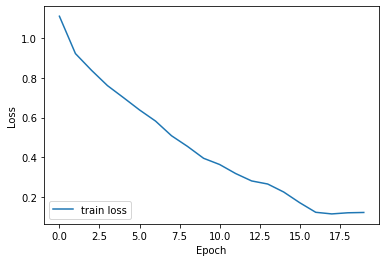

In [73]:
import matplotlib.pyplot as plt
plt.plot(m.history["loss"], label = 'train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

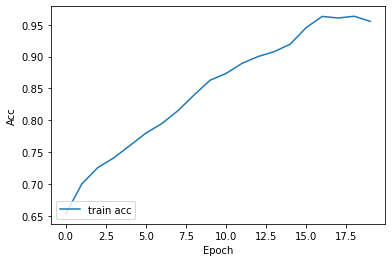

In [74]:
plt.plot(m.history["acc"], label = 'train acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(loc='lower left')

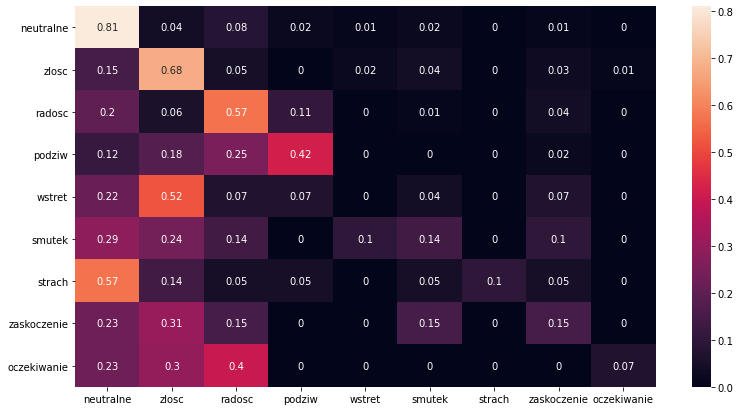

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
labels = ["neutralne", "zlosc", "radosc","podziw","wstret","smutek","strach","zaskoczenie","oczekiwanie"]
cm = confusion_matrix(y_test, y_pred_after)
con_mat_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
df_cm = pd.DataFrame(con_mat_norm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (13,7))
sn.heatmap(df_cm, annot=True)